## Dimensionality Reduction: PCA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
# import iris data set
df = pd.read_csv("iris.data", names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Data Preparation**

In [3]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

### PCA implementation

Instructions (based on the lecture slides):

- Calculate W to project dataset in dimensions x1, x2 to z1, z2
- Plot original and projected datasets to demonstrate effects of PCA on this toy dataset.

In [4]:
def cal_covariance_matrix(dataset , mean_vector):
    col_len = dataset.shape[1]
    result = np.zeros((col_len, col_len)) 
    for item  in dataset:
        variance = np.matrix(np.array(item) - mean_vector)
        temp = np.dot(np.transpose(variance) , variance)
        result += temp
    
    return (result / (len(dataset) - 1))   

### Caculate Covariance matrix

In [5]:
mean_v = x.mean(axis=0)
covariance_matrix = cal_covariance_matrix(x,mean_v)

print("Covariance matrix")
print(covariance_matrix)


Covariance matrix
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


### Calculate Eigen value and Eigen vector

In [6]:
eig_val_cov, eig_vec_cov = np.linalg.eig(covariance_matrix)

print("Eigen Vector")
print(eig_vec_cov)

print("Eigen Value")
print(eig_val_cov)


Eigen Vector
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigen Value
[2.93035378 0.92740362 0.14834223 0.02074601]


### Calculate W

In [7]:
reduce_number = 2
matrix_w = [] #eig_vec_cov[:, :reduce_number]

for i in range(reduce_number):
    item = eig_vec_cov[: , i]
    matrix_w.append(item)

matrix_w = np.array(matrix_w)
print('Matrix W:\n', matrix_w)



Matrix W:
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]]


### Project dataset in dimensions

In [8]:
X_= x - mean_v
reduced_y = np.dot( X_ , matrix_w.T,)

data = pd.DataFrame(data = reduced_y, columns = ['pc1', 'pc2'])
reduced_Df = pd.concat([data, df[['target']]], axis = 1)

reduced_Df.head()

,pc1,pc2,target
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


### Plot Data after dimension reduction

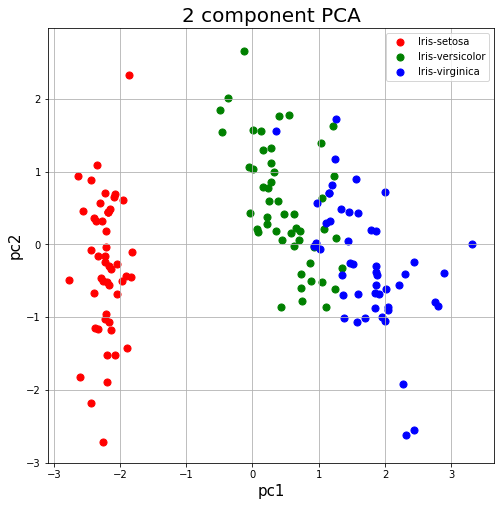

In [9]:
# after PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = reduced_Df['target'] == target
    ax.scatter(reduced_Df.loc[indicesToKeep, 'pc1']
               , reduced_Df.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()